In [1]:
import matplotlib
from plantcv import plantcv as pcv
from plantcv.utils import tabulate_bayes_classes
from plantcv.parallel import WorkflowInputs
import numpy as np
from plantcv.plantcv.analyze import color as analyze_color

In [2]:
args = WorkflowInputs(
    images=[r"C:\Plant_analysis\notebooks\datasets\top_view\sg2.jpg"],
    names="top_view1",
    result="top_view.json",
    outdir="output",
    writeimg=True,
    debug="plot"
)
pcv.params.debug = args.debug
pcv.params.dpi = 100
pcv.params.text_size = 10
pcv.params.text_thickness = 20

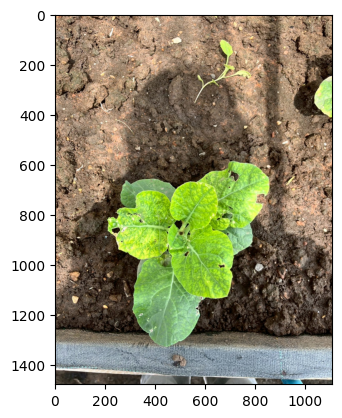

In [3]:
color_img, path, filename = pcv.readimage(filename=r"C:\Plant_analysis\notebooks\datasets\top_view\sg2.jpg")

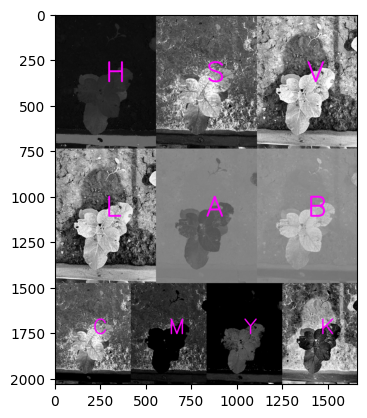

In [4]:
colorspaces = pcv.visualize.colorspaces(rgb_img=color_img, original_img=False)

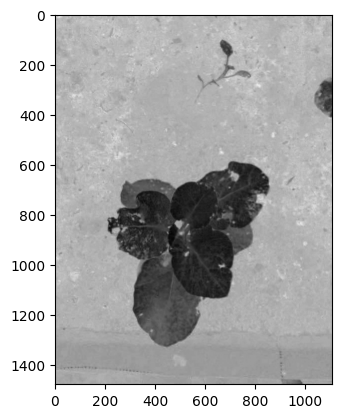

In [5]:
a = pcv.rgb2gray_lab(rgb_img=color_img, channel='a')

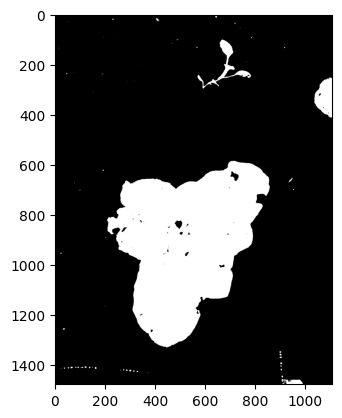

In [6]:
thresh = pcv.threshold.gaussian(gray_img=a, ksize=5000, offset=10,
                              object_type='dark')

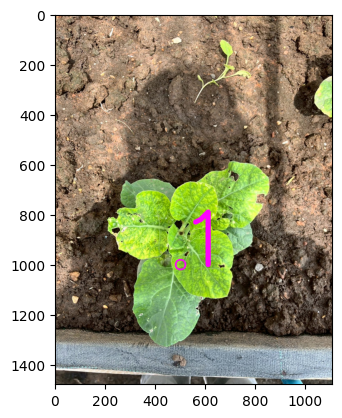

In [7]:
roi = pcv.roi.circle(img=color_img, x=500, y=1000, r=20)

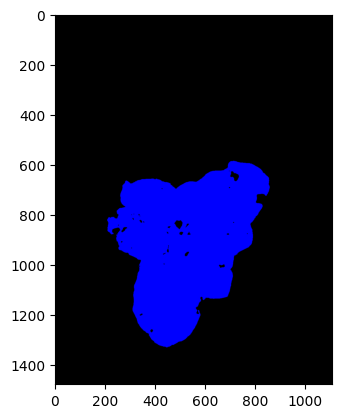

In [8]:
labeled_mask, num_plants = pcv.create_labels(mask=thresh, rois=roi, roi_type='partial')

In [9]:
analyze_color(rgb_img=color_img, labeled_mask=labeled_mask, colorspaces='hsv')

alt.FacetChart(...)

alt.FacetChart(...)

In [10]:
pcv.outputs.save_results(filename="output.json") 

results_dict = pcv.outputs.observations
print(results_dict)

{'default_1': {'hue_frequencies': {'trait': 'hue frequencies', 'method': 'plantcv.plantcv.analyze.color', 'scale': 'frequency', 'datatype': "<class 'list'>", 'value': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002875525682038748, 0.01437762841019374, 0.029114697530642317, 0.06577764997663635, 0.13047697782250817, 0.25268681930915493, 0.3957442219905826, 0.5323316918874231, 1.019733294992991, 1.373063513173502, 2.3198303439847594, 3.990870205959527, 5.776931095215844, 7.829337550771, 9.088458358793718, 8.736565903454226, 9.051435965637468, 7.305991876639949, 5.86499406922828, 4.026454836274756, 3.662700837496855, 2.765177383990511, 2.2137953344595807, 1.9902232126810682, 1.7741993458179073, 1.9445742424787031, 1.8802343553430862, 1.7184860357284066, 1.9506847345530356, 1.5668020560008626, 1.7285503756155425, 1.7238776463822294, 1.5513461054599043, 0.8206031415118076, 1.384925056611912, 1.00751

In [11]:
import pandas as pd

obs = pcv.outputs.observations  # ดึงข้อมูลทั้งหมด
data = {k: {m: v['value'] for m, v in v2.items()} for k, v2 in obs.items()}  # แปลง nested dict
df = pd.DataFrame(data)
print(df.T)  # .T เพื่อให้แต่ละวัตถุเป็นแถว


                                             hue_frequencies  \
default_1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                      saturation_frequencies  \
default_1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                           value_frequencies  \
default_1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

          hue_circular_mean hue_circular_std hue_median  
default_1         90.821101        14.190208       86.0  


In [12]:
df.T.to_csv("plantcv_color_results.csv")


In [13]:
import json
with open("output.json", "r") as f:
    data = json.load(f)

print(data.keys()) 


dict_keys(['metadata', 'observations'])


In [14]:
print(data["observations"].keys())


dict_keys(['default_1'])


In [15]:
print(data["observations"]["default_1"].keys())


dict_keys(['hue_frequencies', 'saturation_frequencies', 'value_frequencies', 'hue_circular_mean', 'hue_circular_std', 'hue_median'])
